# Supplementary Figures - Integrative analysis of RNA-seq & ATAC-seq

In [1]:
# set correct working directory -> project folder
getwd()
setwd('..')
getwd()

[1] "/home/sreichl/projects/bmdm-stim/workflow/notebooks"

[1] "/home/sreichl/projects/bmdm-stim"

In [22]:
# source the figure theme, libraries and utility functions
source("./src/figure_theme.R")

# configs

In [3]:
# configs
data_path <- file.path('results','INT')
results_path <- file.path('results','figures','supp_INT')

LFC_filter <- 1
AveExpr_filter <- 1
adjp_filter <- 0.05

# time-series
timeseries_k <- read.csv(file=file.path('config','BMDM_timeseries_k.csv'), row.names=1, header=TRUE)

# enrichment analysis
timeseries_enrichment_terms <- read.csv(file=file.path('config','BMDM_timeseries_enrichment_terms.csv'), row.names=1, header=TRUE)

In [4]:
# make directories if not exist
dir.create(results_path, showWarnings = FALSE, recursive = TRUE)

# Load data

In [5]:
# load annotations
annot <- read.csv(file=file.path(data_path,'INT_annotations.csv'), row.names=1)
dim(annot)
head(annot)

[1] 142   5

,library,treatment,time,experiment,group
,<chr>,<chr>,<chr>,<chr>,<chr>
RNA_PT76_R1_C_albicans_2h,Quant-seq,C_albicans,2h,PT76,C_albicans_2h
RNA_PT82_R1_C_albicans_24h,Quant-seq,C_albicans,24h,PT82,C_albicans_24h
RNA_PT76_R1_C_albicans_4h,Quant-seq,C_albicans,4h,PT76,C_albicans_4h
RNA_PT76_R1_C_albicans_6h,Quant-seq,C_albicans,6h,PT76,C_albicans_6h
RNA_PT82_R1_C_albicans_8h,Quant-seq,C_albicans,8h,PT82,C_albicans_8h
RNA_PT76_R1_untreated_0h,Quant-seq,untreated,0h,PT76,untreated_0h


In [6]:
# load gene annotations
annot_genes <- read.csv(file=file.path('results','RNA','counts', "gene_annotation.tsv"), sep='\t', row.names=1)
dim(annot_genes)
head(annot_genes)

[1] 55487     8

,version,source,external_gene_name,external_gene_source,description,gene_biotype,length,gc
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>
ENSMUSG00000000194,13,ensembl_havana,Gpr107,MGI Symbol,G protein-coupled receptor 107 [Source:MGI Symbol;Acc:MGI:2139054],protein_coding,12766,0.4945950
ENSMUSG00000000247,11,ensembl_havana,Lhx2,MGI Symbol,LIM homeobox protein 2 [Source:MGI Symbol;Acc:MGI:96785],protein_coding,4393,0.5970863
ENSMUSG00000000544,14,ensembl_havana,Gpa33,MGI Symbol,glycoprotein A33 (transmembrane) [Source:MGI Symbol;Acc:MGI:1891703],protein_coding,2742,0.5309993
ENSMUSG00000000817,10,ensembl_havana,Fasl,MGI Symbol,"Fas ligand (TNF superfamily, member 6) [Source:MGI Symbol;Acc:MGI:99255]",protein_coding,1937,0.4305627
ENSMUSG00000000889,8,ensembl_havana,Dbh,MGI Symbol,dopamine beta hydroxylase [Source:MGI Symbol;Acc:MGI:94864],protein_coding,2692,0.5549777
ENSMUSG00000001138,13,ensembl_havana,Cnnm3,MGI Symbol,cyclin M3 [Source:MGI Symbol;Acc:MGI:2151055],protein_coding,6420,0.5610592


In [7]:
# load data
data <- read.csv(file=file.path(data_path,'INT_norm_batchCorrected.csv'), row.names=1)
dim(data)
head(data)

[1] 45069   142

,RNA_PT76_R1_C_albicans_2h,RNA_PT82_R1_C_albicans_24h,RNA_PT76_R1_C_albicans_4h,RNA_PT76_R1_C_albicans_6h,RNA_PT82_R1_C_albicans_8h,RNA_PT76_R1_untreated_0h,RNA_PT82_R1_untreated_24h,RNA_PT76_R1_IFN_beta_2h,RNA_PT82_R1_IFN_beta_24h,RNA_PT76_R1_IFN_beta_4h,⋯,PT82_R2_IFN_gamma_24h,PT82_R2_IFN_gamma_8h,PT82_R2_LCMV_Cl13_24h,PT82_R2_LCMV_Cl13_8h,PT82_R2_LO28_24h,PT82_R2_LO28_8h,PT82_R2_LPS_24h,PT82_R2_LPS_8h,PT82_R2_untreated_24h,PT82_R2_untreated_8h
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSMUSG00000098104,1.405811,2.827185,-0.7344103,2.015832,1.521031,3.228688,2.443284,2.954642,2.672776,-0.7365572,⋯,2.264365,1.603131,1.746338,2.408978,4.287098,2.401559,1.770998,2.254504,2.257990,1.865165
ENSMUSG00000033845,6.087384,6.123522,6.2594799,5.883915,6.154641,6.080316,6.096749,6.199833,5.787196,5.9959065,⋯,5.844907,5.454590,6.053874,5.719627,4.401719,6.243460,5.413775,6.492471,5.652902,5.521632
ENSMUSG00000025903,5.435192,5.343274,5.5866605,5.477830,5.306164,5.720310,5.474042,5.958396,5.553141,5.8954757,⋯,6.012205,5.787282,6.043073,6.040258,6.120597,5.372314,6.189717,5.049843,5.738152,5.618413
ENSMUSG00000033813,4.858575,4.733815,4.6249625,5.058409,4.792464,4.719336,4.838214,4.948055,5.124871,5.7984825,⋯,4.993532,4.982980,5.053641,5.113319,4.966217,4.844944,4.757180,4.834565,5.186421,5.191404
ENSMUSG00000033793,6.449895,6.132281,6.7044679,6.296670,6.653410,6.073398,6.311933,6.476513,6.349170,6.3236133,⋯,5.011635,5.826719,6.776081,6.321676,6.470296,6.210140,5.961353,5.999122,6.177158,6.482480
ENSMUSG00000025907,6.392849,6.626331,6.3776922,6.415400,6.320045,6.421428,6.538384,6.015843,6.817085,6.0667091,⋯,7.103102,6.614379,6.596467,6.889029,6.439346,6.760602,6.438620,6.152258,6.992512,7.036765


In [8]:
# load DEA results
dea_results <-  read.csv(file=file.path(data_path,'DEA','INT_DEA_all.csv'))
dim(dea_results)
head(dea_results)

[1] 1397139      10

,rn,logFC,AveExpr,t,P.Value,adj.P.Val,B,time,treatment,group
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,ENSMUSG00000074141,3.2480017,3.7435293,8.102705,3.703750e-12,8.346216e-08,16.70740,24h,C_albicans,C_albicans_24h
2,ENSMUSG00000108227,3.2007473,2.4458418,8.204313,2.315435e-12,8.346216e-08,16.54095,24h,C_albicans,C_albicans_24h
3,ENSMUSG00000039699,2.0420182,5.9732862,7.750445,1.878408e-11,2.821932e-07,15.48835,24h,C_albicans,C_albicans_24h
4,ENSMUSG00000032883,-1.3106106,5.3624098,-7.620933,3.404211e-11,3.835610e-07,15.18263,24h,C_albicans,C_albicans_24h
5,ENSMUSG00000079184,-0.8536463,6.9781679,-7.369471,1.075002e-10,8.074875e-07,14.11205,24h,C_albicans,C_albicans_24h
6,ENSMUSG00000095574,-1.8943035,-0.6882451,-7.407370,9.043323e-11,8.074875e-07,13.62366,24h,C_albicans,C_albicans_24h


# Epigenetic correlation panel

In [9]:
corr_plots <- list()
for (treatment in sort(unique(annot$treatment))){
    for (time in c('2h','4h','6h','8h','24h')){
        if(treatment=="untreated"){
            if (time=="2h"){
                time <- '0h'
            }else{
                next
            }
        }
       
        tmp_data <- data.frame(matrix(nrow=nrow(data), ncol=0, dimnames=list(rownames(data), NULL)))
        
        
        if (length(rownames(annot)[(annot$treatment==treatment) & (annot$time==time) & (annot$library=='Quant-seq')])>1){
            tmp_data$rna <- rowMeans(data[,rownames(annot)[(annot$treatment==treatment) & (annot$time==time) & (annot$library=='Quant-seq')]])
        }else{
            tmp_data$rna <- data[,rownames(annot)[(annot$treatment==treatment) & (annot$time==time) & (annot$library=='Quant-seq')]]
        }
        
        tmp_data$atac <- rowMeans(data[,rownames(annot)[(annot$treatment==treatment) & (annot$time==time) & (annot$library=='ATAC-seq')]])

        tmp_dea <- data.table(dea_results[(dea_results$group==paste0(treatment,'_',time)),])
        tmp_dea[, type := ifelse((adj.P.Val<adjp_filter) & (abs(logFC)>LFC_filter) & (AveExpr>AveExpr_filter),ifelse(logFC>0,'ATAC','RNA'),'correlated')]

        tmp_dea <- as.data.frame(tmp_dea)
        rownames(tmp_dea) <- tmp_dea$rn
        tmp_data$type <- tmp_dea[rownames(tmp_data), 'type']

#         width <- 3
#         height <- 3
#         options(repr.plot.width=width, repr.plot.height=height)

        tmp_plot <- ggplot(tmp_data) +
        geom_point(data = subset(setDT(setDF(tmp_data)), type == 'correlated'), aes(x = atac, y = rna, color = type), alpha=0.05, size=0.5, stroke = 0, shape=19) +
        geom_point(data = subset(setDT(setDF(tmp_data)), type != 'correlated'), aes(x = atac, y = rna, color = type), alpha=1, size=0.5, stroke = 0, shape=19) +
        scale_color_manual(values=correlation_colors, drop=FALSE) +
        labs(title=paste0(treatment_format(treatment)," ",time))+
        annotate(x=min(tmp_data$atac), y = max(tmp_data$rna), label=paste("Pearson's R = ", round(cor(tmp_data$atac, tmp_data$rna),2)), geom="text", hjust=0, size=3)+
        annotate(x=8, y = 2, label=table(tmp_data$type)[['ATAC']], geom="label", hjust=0, size=4, fill = correlation_colors[['ATAC']])+
        annotate(x=0, y = 8, label=table(tmp_data$type)[['RNA']], geom="label", hjust=0, size=4, fill = correlation_colors[['RNA']])+
        annotate(x=8, y = 11, label=table(tmp_data$type)[['correlated']], geom="label", hjust=0, size=4, color = 'black')+
#         ylab("Gene Expression (signal intensity)") +
#         xlab("Chromatin Accessibility (signal intensity)") +
        macro_theme() + theme(axis.title.x=element_blank(),
                              axis.title.y=element_blank(),
                             legend.position = "none")

#         tmp_plot
        corr_plots[[paste0(treatment,"_",time)]]<-tmp_plot
    }
}

In [10]:
width <- 15 #+ 1 # +1 for legend
height <- 21
options(repr.plot.width=width, repr.plot.height=height)

In [11]:
corr_plots_panel <- wrap_plots(corr_plots, ncol=5, guides="collect")
# corr_plots_panel

In [12]:
# save plot
ggsave_new(filename=paste0("epigenetic_correlation_panel"),
           results_path=results_path,
           plot=corr_plots_panel,
           width=width,
           height=height
          )

# Time Series Clustering - all timecourses

In [55]:
cluster_colors <- cluster_colors[c('1','2','3','4','5','6','7')]

In [56]:
# load & plot all INT time series clusters
ts_cond_p <- list()

for (treatment in unique(annot$treatment)){
    if (treatment=='untreated'){
        next
    }
    
    ts_k <- timeseries_k[treatment, 'INT']

    tmp_centers <- read.delim(file=file.path(data_path, "time_series", treatment, paste0('k_',ts_k), paste0('clustercenters_',treatment,'.csv')), sep=',', header = TRUE)#, row.names=1)
    tmp_centers <- melt(t(tmp_centers))
    tmp_centers$Var1 <- paste0(lapply(tmp_centers$Var1, function(x) as.character(x)))
    colnames(tmp_centers) <- c('time','cluster','LFC')
    tmp_centers <- tmp_centers[tmp_centers$time!='X',]
    tmp_centers$time <- str_remove(tmp_centers$time,'X')
    tmp_centers$time <- str_remove(tmp_centers$time,'h')
    tmp_centers$time <- factor(tmp_centers$time, levels=c("0", "2", "4", "6","8", "24"))

    tmp_centers$cluster <- paste0(tmp_centers$cluster)

    treatment <- str_replace(treatment, '_', ' ')
    tmp_centers$treatment <- treatment
    


#     options(repr.plot.width=2, repr.plot.height=1.5)

    tmp_centers_p <- ggplot(tmp_centers, aes(x=time, y=LFC, group=cluster)) +
    geom_line(aes(color=cluster), size=0.75)+
    facet_grid(. ~ treatment, labeller = labeller(treatment = treatment_format)) +
    scale_x_discrete(expand = expansion(add = 0))+
    scale_color_manual(values=cluster_colors) +
#     geom_dl(aes(label = cluster), method = list(dl.trans(x = x + 0.2), "last.points", cex = 0.8)) + 
    macro_theme() + 
    ylab("Effect size [log2 fold change]") +
    xlab("Time [hours]") +
    theme(
        strip.background = element_rect(fill=treatment_colors[treatment]), 
        strip.text = element_text(colour = 'white', face = "bold"),
        panel.border = element_rect(colour = "black", fill=NA, size=0.5),
        legend.position = "none")

    # save plot
    ggsave_new(filename=paste0("time_series_clusters_",treatment),
               results_path=results_path,
               plot=tmp_centers_p,
               width=2,
               height=2
              )
                                      
                                      
                                      
    ts_cond_p[[treatment]] <- tmp_centers_p#+guides(shape = "none", color="none")
}

Warning message in melt(t(tmp_centers)):
“The melt generic in data.table has been passed a matrix and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(t(tmp_centers)). In the next version, this warning will become an error.”
Warning message in melt(t(tmp_centers)):
“The melt generic in data.table has been passed a matrix and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(t(tmp_centers)). In the next version, this warning will become an error.”
Warning message in melt(t(tmp_centers)):
“The melt generic in 

In [57]:
width <- 7
height <- 4
options(repr.plot.width=width, repr.plot.height=height)

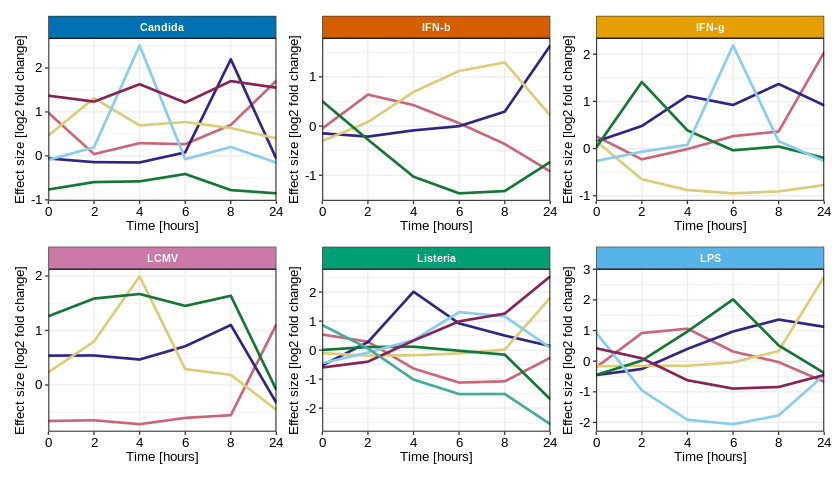

In [58]:
all_ts_p <- wrap_plots(ts_cond_p, guides="collect")
all_ts_p

In [17]:
# save plot
ggsave_new(filename="time_series_clusters_ALL",
           results_path=results_path,
           plot=all_ts_p,
           width=width,
           height=height
          )

# Time Series Clustering - Summary plot

In [26]:
# load and summarize results for each treatment (treatment, cluster, number of genes/regions)
clust_int <- data.table()

for (treatment in unique(annot$treatment)){
    if (treatment=='untreated'){
        next
    }
    
    ts_k <- timeseries_k[treatment, 'INT']
    tmp_clust <- read.delim(file=file.path(data_path, "time_series", treatment, paste0('k_',ts_k), paste0('clustering_',treatment,'.csv')), sep=',', header = TRUE)#, row.names=1)

    tmp_sum <- data.table(table(tmp_clust[,4]))
    colnames(tmp_sum) <- c('cluster', 'n')
    tmp_sum$treatment <- treatment

    if (nrow(clust_int)==0){
        clust_int <- tmp_sum
    }else{
        clust_int <- rbind(clust_int, tmp_sum)
    }
}

dim(clust_int)
head(clust_int)

[1] 32  3

cluster,n,treatment
<chr>,<int>,<chr>
1,92,C_albicans
2,58,C_albicans
3,114,C_albicans
4,109,C_albicans
5,27,C_albicans
6,77,C_albicans


In [27]:
# order by total number of genes/regions (left to right)
treatment_sum <- clust_int[,sum(n),by=treatment][order(V1),]
treatments_ordered <- treatment_sum$treatment
clust_int$treatment <- factor(clust_int$treatment, levels=rev(treatments_ordered))

# get number of clusters
treatment_cluster_n <- data.frame(clust_int[, max(as.numeric(cluster)),by=treatment])
rownames(treatment_cluster_n) <- treatment_cluster_n$treatment
treatment_cluster_n$treatment <- NULL
treatment_sum$clusters_n <- treatment_cluster_n[treatment_sum$treatment,'V1']

# sort legend
clust_int$cluster <- factor(clust_int$cluster, levels=sort(as.numeric(unique(clust_int$cluster))))

In [29]:
width <- 1
height <- 2
options(repr.plot.width=width, repr.plot.height=height)

In [30]:
clust_sum_p <- list()

for(group in unique(clust_int$treatment)){
    clust_tmp_p <- ggplot() + 
        geom_bar(data=clust_int[clust_int$treatment==group,], aes(fill=cluster, y=(n), x=treatment), position="stack", stat="identity")+
    geom_text(data=treatment_sum[treatment_sum$treatment==group,], aes(x=treatment, y=V1, label=clusters_n), vjust=-0.25, hjust=0.5, size=3)+
    geom_text(data=treatment_sum[treatment_sum$treatment==group,], aes(x=treatment, y=V1, label=V1), vjust=1.5, hjust=0.5, size=3, color="white")+
    scale_fill_manual(values=cluster_colors, limits = force) +
    ggtitle(treatment_format(group)) +
    ylab("Number of deviating genes") +
    scale_y_continuous(expand=expansion(mult = c(0, .075))) +
    # ylim(0,5500) +
    macro_theme() + 
    theme(axis.title.x = element_blank(),
          axis.text.x = element_blank(),
         axis.ticks.x = element_blank(),
         legend.position = "none")

    clust_sum_p[[group]] <- clust_tmp_p

    # save plot
    ggsave_new(filename=paste0("time_series_clustering_",group),
               results_path=results_path,
               plot=clust_tmp_p,
               width=width,
               height=height
              )
}

In [31]:
width <- 4
height <- 2
options(repr.plot.width=width, repr.plot.height=height)

In [32]:
cluster_colors

1         2         3         4         5         6         7 
"#CC6677" "#332288" "#DDCC77" "#117733" "#88CCEE" "#882255" "#44AA99"

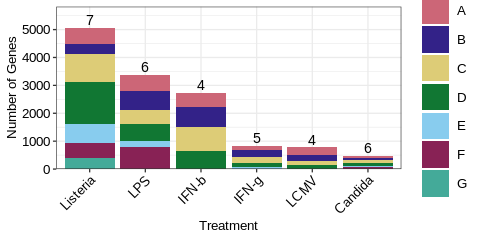

In [33]:
clust_int_p <- ggplot() + 
    geom_bar(data=clust_int, aes(fill=cluster, y=(n), x=treatment), position="stack", stat="identity")+
geom_text(data=treatment_sum, aes(x=treatment, y=V1, label=clusters_n), vjust=-0.25, hjust=0.5, size=3)+
scale_fill_manual(labels=cluster_format2, values=cluster_colors, limits = force) +
ylab("Number of Genes") +
        xlab("Treatment") +
scale_y_continuous(expand=expansion(mult = c(0, .15))) +
scale_x_discrete(label=treatment_format) + 
    macro_theme() + 
theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust=1))

clust_int_p

In [48]:
# save plot
ggsave_new(filename="time_series_clustering_summary",
           results_path=results_path,
           plot=clust_int_p,
           width=width,
           height=height
          )

# RNA vs ATAC signal intensities per time-series cluster for each treatment

In [35]:
times <- c('0h','2h', '4h', '6h', '8h', '24h')
# treatment <- 'LO28'

In [36]:
ts_cluster_label <- function(x) {
    x <- cluster_format2(x)
    return(paste0("Cluster ", x))
  }

Warning message in melt.data.table(ts_p):
“id.vars and measure.vars are internally guessed when both are 'NULL'. All non-numeric/integer/logical type columns are considered id.vars, which in this case are columns [time, cluster]. Consider providing at least one of 'id' or 'measure' vars in future.”
Warning message in melt.data.table(ts_p):
“id.vars and measure.vars are internally guessed when both are 'NULL'. All non-numeric/integer/logical type columns are considered id.vars, which in this case are columns [time, cluster]. Consider providing at least one of 'id' or 'measure' vars in future.”
Warning message in melt.data.table(ts_p):
“id.vars and measure.vars are internally guessed when both are 'NULL'. All non-numeric/integer/logical type columns are considered id.vars, which in this case are columns [time, cluster]. Consider providing at least one of 'id' or 'measure' vars in future.”
Warning message in melt.data.table(ts_p):
“id.vars and measure.vars are internally guessed when both

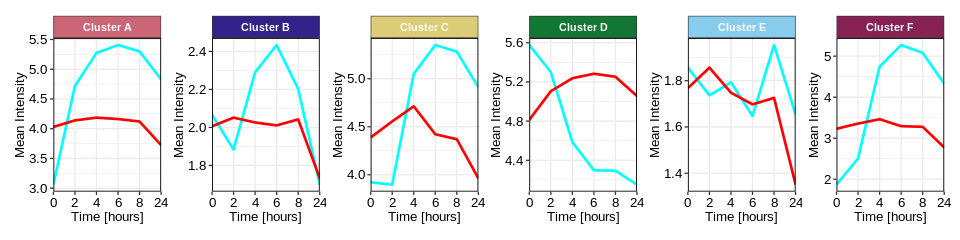

Warning message in melt.data.table(ts_p):
“id.vars and measure.vars are internally guessed when both are 'NULL'. All non-numeric/integer/logical type columns are considered id.vars, which in this case are columns [time, cluster]. Consider providing at least one of 'id' or 'measure' vars in future.”
Warning message in melt.data.table(ts_p):
“id.vars and measure.vars are internally guessed when both are 'NULL'. All non-numeric/integer/logical type columns are considered id.vars, which in this case are columns [time, cluster]. Consider providing at least one of 'id' or 'measure' vars in future.”
Warning message in melt.data.table(ts_p):
“id.vars and measure.vars are internally guessed when both are 'NULL'. All non-numeric/integer/logical type columns are considered id.vars, which in this case are columns [time, cluster]. Consider providing at least one of 'id' or 'measure' vars in future.”
Warning message in melt.data.table(ts_p):
“id.vars and measure.vars are internally guessed when both

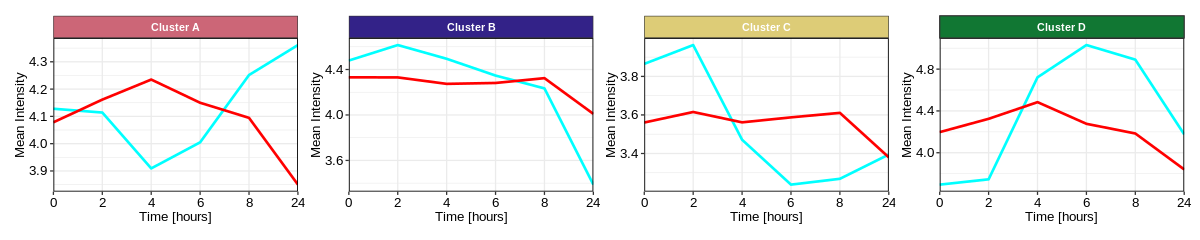

Warning message in melt.data.table(ts_p):
“id.vars and measure.vars are internally guessed when both are 'NULL'. All non-numeric/integer/logical type columns are considered id.vars, which in this case are columns [time, cluster]. Consider providing at least one of 'id' or 'measure' vars in future.”
Warning message in melt.data.table(ts_p):
“id.vars and measure.vars are internally guessed when both are 'NULL'. All non-numeric/integer/logical type columns are considered id.vars, which in this case are columns [time, cluster]. Consider providing at least one of 'id' or 'measure' vars in future.”
Warning message in melt.data.table(ts_p):
“id.vars and measure.vars are internally guessed when both are 'NULL'. All non-numeric/integer/logical type columns are considered id.vars, which in this case are columns [time, cluster]. Consider providing at least one of 'id' or 'measure' vars in future.”
Warning message in melt.data.table(ts_p):
“id.vars and measure.vars are internally guessed when both

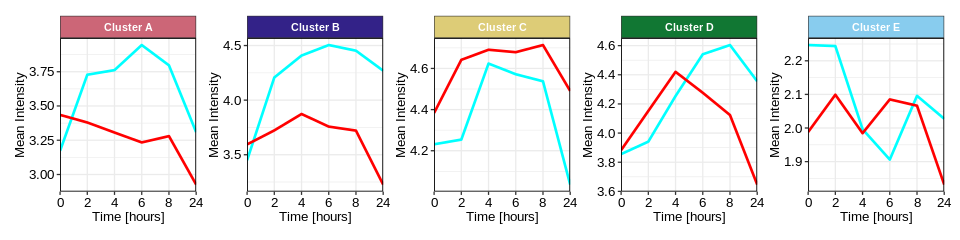

Warning message in melt.data.table(ts_p):
“id.vars and measure.vars are internally guessed when both are 'NULL'. All non-numeric/integer/logical type columns are considered id.vars, which in this case are columns [time, cluster]. Consider providing at least one of 'id' or 'measure' vars in future.”
Warning message in melt.data.table(ts_p):
“id.vars and measure.vars are internally guessed when both are 'NULL'. All non-numeric/integer/logical type columns are considered id.vars, which in this case are columns [time, cluster]. Consider providing at least one of 'id' or 'measure' vars in future.”
Warning message in melt.data.table(ts_p):
“id.vars and measure.vars are internally guessed when both are 'NULL'. All non-numeric/integer/logical type columns are considered id.vars, which in this case are columns [time, cluster]. Consider providing at least one of 'id' or 'measure' vars in future.”
Warning message in melt.data.table(ts_p):
“id.vars and measure.vars are internally guessed when both

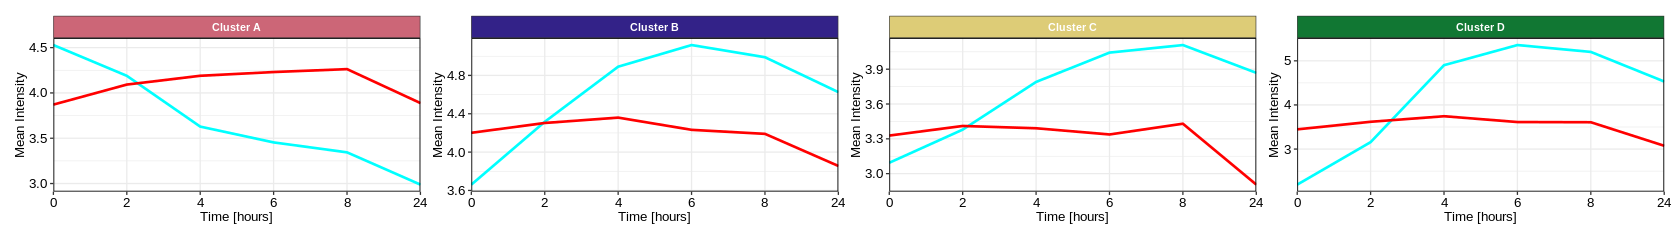

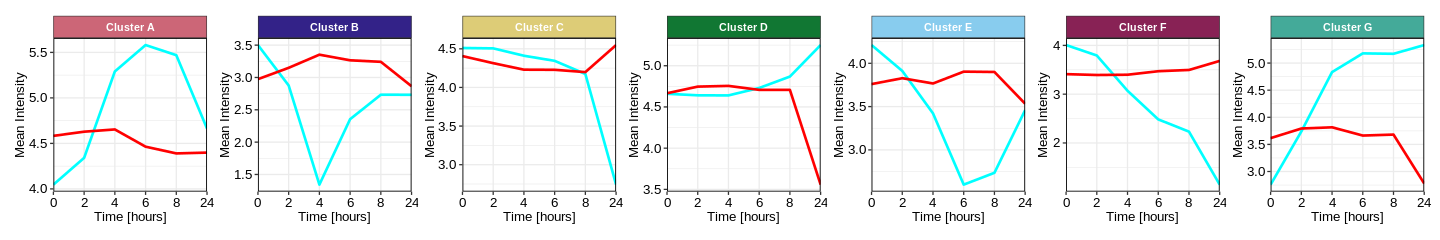

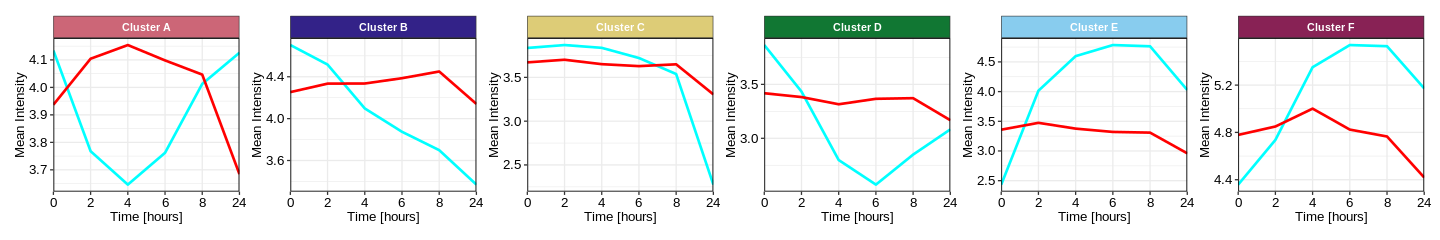

In [37]:
intensity_plots <- list()
for (treatment in sort(unique(annot$treatment))){
    if(treatment=="untreated"){
        next
    }

    # load & plot all mean intensities per Listeria time series cluster
    ts_p_all <- list()
    ts_k <- timeseries_k[treatment, 'INT']

    ts_clustering_results <- read.delim(file=file.path(data_path, "time_series", treatment, paste0('k_',ts_k), paste0('clustering_',treatment,'.csv')), sep=',', row.names=2)
    ts_clustering_results <- ts_clustering_results[,-1]
    colnames(ts_clustering_results) <- c('gene_name','cluster')

    for (k in 1:ts_k){

        tmp_genes <- rownames(ts_clustering_results)[ts_clustering_results$cluster==k]

        tmp_ts_rna <- data.frame(matrix(ncol=0,nrow=length(tmp_genes), dimnames=list(tmp_genes,NULL)))
        tmp_ts_atac <- data.frame(matrix(ncol=0,nrow=length(tmp_genes), dimnames=list(tmp_genes,NULL)))

        for (time in times){
            if (time=='0h'){
                tmp_ts_rna[[time]] <- rowMeans(data[rownames(tmp_ts_rna),(annot$library=='Quant-seq') & (annot$treatment=='untreated')])
                tmp_ts_atac[[time]] <- rowMeans(data[rownames(tmp_ts_atac),(annot$library=='ATAC-seq') & (annot$treatment=='untreated')])
            } else{
                tmp_ts_rna[[time]] <- rowMeans(data[rownames(tmp_ts_rna),(annot$library=='Quant-seq') & (annot$group==paste0('LO28','_',time))])
                tmp_ts_atac[[time]] <- rowMeans(data[rownames(tmp_ts_atac),(annot$library=='ATAC-seq') & (annot$group==paste0('LO28','_',time))])
            }
        }

        ts_p <- t(rbind(colMeans(tmp_ts_rna), colMeans(tmp_ts_atac)))
        colnames(ts_p) <- c('RNA','ATAC')
        ts_p <- data.frame(ts_p)
        ts_p$time <- rownames(ts_p)

        ts_p <- data.table(ts_p)
        ts_p$time <- str_remove(ts_p$time,'h')
        ts_p$time <- factor(ts_p$time, levels=c("0", "2", "4", "6","8", "24"))
        ts_p$cluster <- paste0('cluster ',k)
        # ts_p


        # options(repr.plot.width=2, repr.plot.height=1.5)


        ts_p_all[[paste0('cluster',k)]] <- ggplot(melt(ts_p), aes(x=time, y=value, group=variable))+
            geom_line(aes(color=variable), size=0.75)+
    #         ylim(2, 6) +
            facet_grid(. ~ cluster, labeller = ts_cluster_label) +
            scale_x_discrete(expand = expansion(add = 0))+
            scale_color_manual(values=correlation_colors, drop=TRUE) +
           macro_theme() +
        ylab("Mean Intensity") +
        xlab("Time [hours]") +
            theme(
    #             axis.title.x=element_blank(), 
    #             axis.title.y=element_blank(), 
    #             plot.title = element_text(hjust = 0.5), # not necessary
                strip.background = element_rect(fill=cluster_colors[k]), 
                strip.text = element_text(colour = 'white', face = "bold"),
                panel.border = element_rect(colour = "black", fill=NA, size=0.5),
            legend.position = "none")#+
    #         guides(color="none")
    }

    intensity_plots[[treatment]] <- ts_p_all
    
    width <- 2*ts_k #+ 1
    height <- 2
    options(repr.plot.width=width, repr.plot.height=height)

    all_ts_p <- wrap_plots(ts_p_all, ncol=ts_k, guides="collect")
    print(all_ts_p)

    # save plot
    ggsave_new(filename=paste0("time_series_clusters_mean_intensities_", treatment),
               results_path=results_path,
               plot=all_ts_p,
               width=width,
               height=height
              )
}

# Summary Figure for clustering and signal intensities

In [141]:
names(clust_sum_p)

[1] "C_albicans" "IFN_beta"   "IFN_gamma"  "LCMV_Cl13"  "LO28"      
[6] "LPS"

In [142]:
names(ts_cond_p) <- gsub(" ", "_", names(ts_cond_p))
names(ts_cond_p)

[1] "C_albicans" "IFN_beta"   "IFN_gamma"  "LCMV_Cl13"  "LO28"      
[6] "LPS"

In [143]:
names(intensity_plots)

[1] "C_albicans" "IFN_beta"   "IFN_gamma"  "LCMV_Cl13"  "LO28"      
[6] "LPS"

In [144]:
empty_plot <- ggplot()+theme_minimal()

In [145]:
summary_plots <- list()

for(cond_tmp in unique(clust_int$treatment)){
    intensity_plots[[cond_tmp]][["empty"]] <- empty_plot # add empty plot to create second row in IFN-beta and LCMV
    summary_plots[[cond_tmp]] <- clust_sum_p[[cond_tmp]]+ts_cond_p[[cond_tmp]]+wrap_plots(intensity_plots[[cond_tmp]], ncol = 4, nrow=2) +
plot_layout(widths = c(0.5,2,5))
}

In [146]:
width <- 8
height <- 6*2.25
options(repr.plot.width=width, repr.plot.height=height)

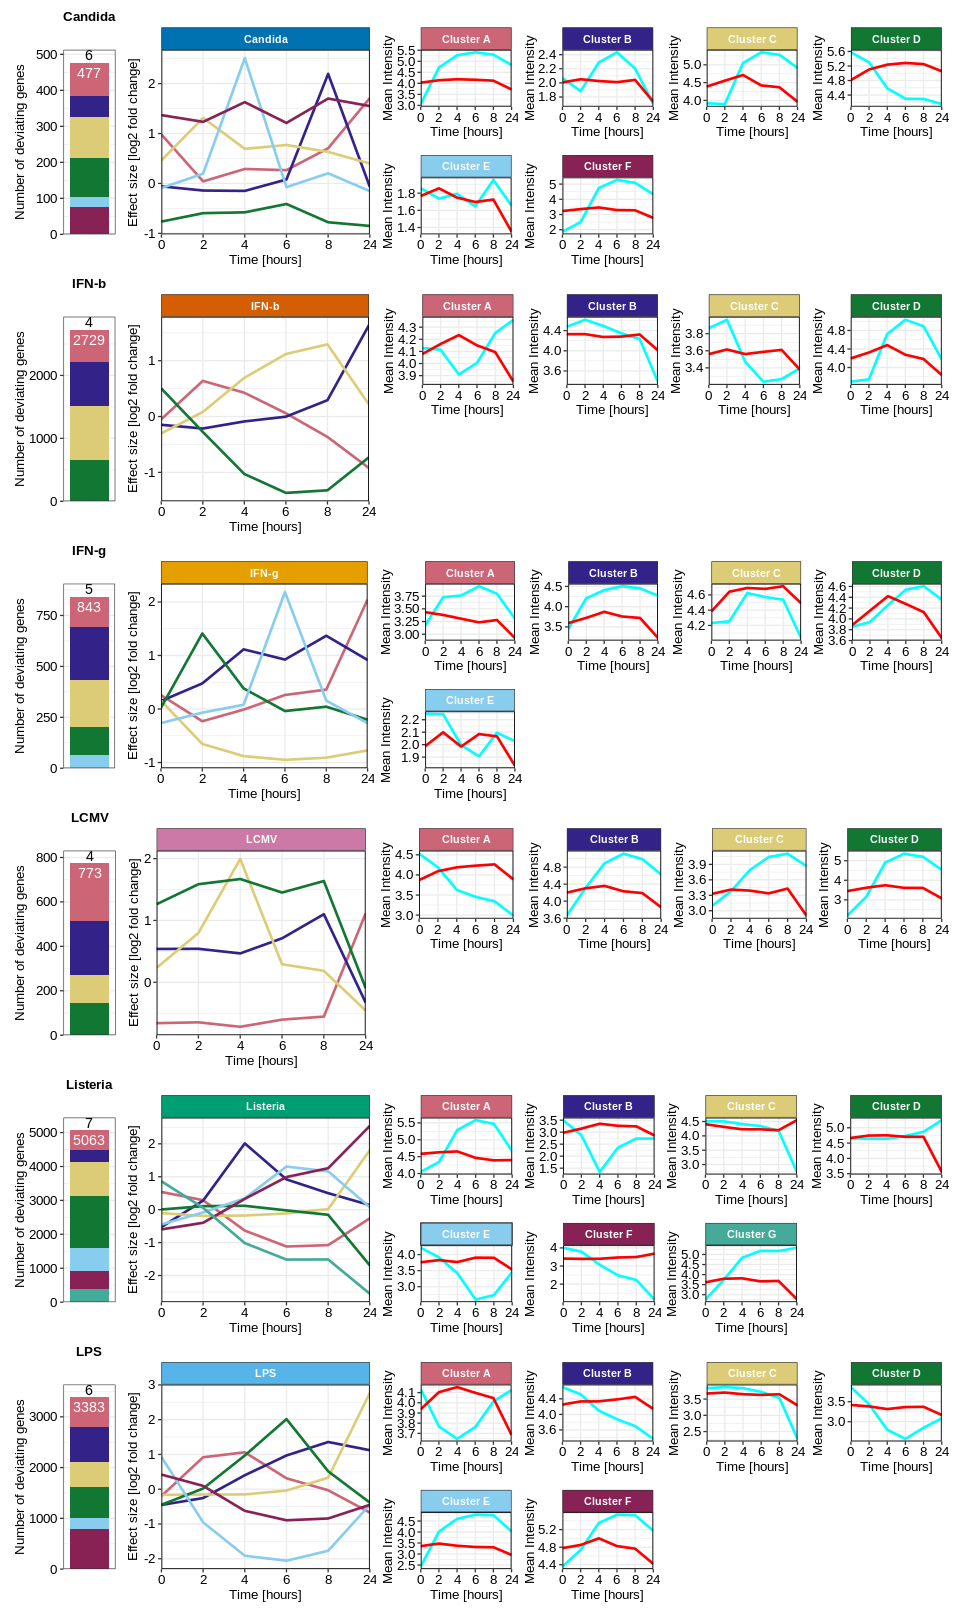

In [147]:
final_summary <- wrap_plots(summary_plots, ncol=1)
final_summary

In [148]:
# save plot
ggsave_new(filename="time_series_summary",
           results_path=results_path,
           plot=final_summary,
           width=width,
           height=height
          )

# Enrichment analysis results for time course clusters

In [28]:
# laod untreated DEA results
UT_DEG <- read.delim(file=file.path(data_path,'DEA',paste0('INT_DEA_','untreated','.csv')), sep = ',', header = TRUE)
UT_DEG <- UT_DEG[, c('group', 'rn', 'logFC')]

In [29]:
mode <- 'data_driven'
db <- 'GO_Biological_Process_2021'

mode_plots <- list()
heights <- list()

for (treatment in unique(annot$treatment)){
    if (treatment=='untreated'){
        next
    }

    # configs
    k_INT <- timeseries_k[treatment, 'INT']
    # relevant only for data driven
    top_n <- ceiling(25/k_INT)
    

    # load adjusted p-values & select most significant terms for each cluster
    tmp_adjpvalues <- read.delim(file=file.path(data_path, 
                                                 "enrichment_analysis", 
                                                 "time_series", 
                                                 treatment, 
                                                 paste0('k_', k_INT), 
                                                 paste0('summary_',db,'_adjpvalues.csv')
                                                ), 
                                  sep=',', header = TRUE, row.names=1)

    # remove all columns with not one single significant hit
    tmp_adjpvalues <- tmp_adjpvalues[,colSums(is.na(tmp_adjpvalues))<nrow(tmp_adjpvalues)]

    # identify most significant terms per group
    #tmp_terms <- unique(as.vector(sapply(tmp_adjpvalues, function(x) rownames(tmp_adjpvalues)[sort(x, index.return = TRUE)$ix][1:top_n])))
    tmp_terms <- unique(as.vector(sapply(tmp_adjpvalues, function(x) rownames(tmp_adjpvalues)[order(x)][1:top_n])))
    #unique(sapply(tmp_adjpvalues, function(x) rownames(tmp_adjpvalues)[sort(x, index.return = TRUE)$ix][1:top_n]))


    # load odds ratios of enrichment results
    tmp_enrichments <- read.delim(file=file.path(data_path, 
                                                 "enrichment_analysis", 
                                                 "time_series", 
                                                 treatment, 
                                                 paste0('k_', k_INT), 
                                                 paste0('summary_',db,'_oddsratio.csv')
                                                ), 
                                  sep=',', header = TRUE, row.names=1)

    # filter by selected enrichment terms
    tmp_enrichments <- tmp_enrichments[tmp_terms,]


    ## prepare data for plotting
    # fill NA and below 1 with 1
    tmp_enrichments[is.na(tmp_enrichments)] <- 1
    tmp_enrichments[tmp_enrichments<1] <- 1
    print(log2(max(tmp_enrichments)))
    # perform hierarchical clustering on the log2 odds ratios of the terms
    hc_INT_rows <- hclust(dist(log2(tmp_enrichments)))#, method="single")
    hc_INT_cols <- hclust(dist(t(log2(tmp_enrichments))))#, method="single")
    tmp_enrichments <- tmp_enrichments[hc_INT_rows$order,hc_INT_cols$order]
    # add column for terms
    tmp_enrichments$terms <- rownames(tmp_enrichments)
    # melt data frame for plotting
    plot_enrichments <- melt(tmp_enrichments)
    # rename columns
    colnames(plot_enrichments) <- c('terms','cluster', 'odds_ratio')

    # load adjusted p-values
    tmp_adjpvalues <- read.delim(file=file.path(data_path, 
                                                 "enrichment_analysis", 
                                                 "time_series", 
                                                 treatment, 
                                                 paste0('k_', k_INT), 
                                                 paste0('summary_',db,'_adjpvalues.csv')
                                                ), 
                                  sep=',', header = TRUE, row.names=1)

    # add adjusted p-values to plot dataframe
    plot_enrichments$adjpvalues <- apply(plot_enrichments, 1, function(x) tmp_adjpvalues[x[1], x[2]])

    plot_enrichments$terms <- remove_term_suffix(db=db, terms=plot_enrichments$terms)

    # calculate & cap -log10(pvalue)
    plot_enrichments$adjpvalues <- -log10(plot_enrichments$adjpvalues)
    plot_enrichments$adjpvalues[plot_enrichments$adjpvalues>4] <- 4

    plot_enrichments$odds_ratio[plot_enrichments$odds_ratio<=1] <- NA

    # ensure that the order of terms is kept
    plot_enrichments$terms <- factor(plot_enrichments$terms,levels=rev(unique(plot_enrichments$terms)))
    plot_enrichments$cluster <- factor(plot_enrichments$cluster, levels=rev(unique(plot_enrichments$cluster)))

#         dim(plot_enrichments)
#         head(plot_enrichments)

    cluster_labels <- str_split(rev(levels(plot_enrichments$cluster)), '_', simplify=TRUE)[,2]
    cluster_labels <- as.character(as.roman(cluster_labels))
    names(cluster_labels) <- rev(levels(plot_enrichments$cluster))

#         width <- 6
#         height <- 5
#         options(repr.plot.width=width, repr.plot.height=height)

    INT_DEG_enr_p <- ggplot(plot_enrichments, aes(x=terms, y=cluster, fill=adjpvalues, size=log2(odds_ratio)))+ 
    # geom_point() +
    geom_point(shape=21, stroke=0.25) +
    # scale_color_gradient(low="grey", high="red") +
    scale_fill_gradient(low="grey", high="red", breaks = c(1, 2, 3, 4), limits = c(0, 4)) +
    #scale_x_discrete(label=addline_format) + 
    scale_size_continuous(
#             range = c(0.5,5) 
        breaks = c(1, 3, 5, 7),
        limits = c(0, 7)
    ) +
    macro_theme() +
    scale_y_discrete(limits = rev(levels(plot_enrichments$cluster)), labels = cluster_labels) +
    labs(title = treatment_format(treatment)) + 
    theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust=1),
          axis.title.x=element_blank(),
          axis.title.y=element_blank())

#         INT_DEG_enr_p

    # load INT time-series clustering
    INT_clustering <- read.delim(file=file.path(data_path, "time_series", treatment, paste0('k_',k_INT), paste0('clustering_',treatment,'.csv')), sep=',', header = TRUE, row.names=2)
    INT_clustering[,1] <- NULL
    colnames(INT_clustering) <- c('gene','cluster')

#         dim(INT_clustering)
#         head(INT_clustering)

    # load INT DEA results for individual cluster plots
    INT_DEG <- read.delim(file=file.path(data_path,'DEA',paste0('INT_DEA_',treatment,'.csv')), sep = ',', header = TRUE)
    INT_DEG <- INT_DEG[, c('group', 'rn', 'logFC')]

#         dim(INT_DEG)
#         head(INT_DEG)

    times <- c('0h','2h','4h','6h','8h','24h')
    INT_DEG_new <- data.frame()
    for (time in times){
        if (time=='0h'){
            tmp_df <- UT_DEG[,c('rn','logFC')]
        }else{
            tmp_df <- INT_DEG[INT_DEG$group==paste0(treatment,'_',time),c('rn','logFC')]
        }
        colnames(tmp_df) <- c('rn',time)
        if (dim(INT_DEG_new)[1]==0){
            INT_DEG_new <- tmp_df
        }
        else{
            INT_DEG_new <- merge(INT_DEG_new, tmp_df, by='rn')
        }

    }

    rownames(INT_DEG_new) <- INT_DEG_new$rn
    INT_DEG_new$rn <- NULL
    # colnames(INT_DEG_new) <- str_remove(colnames(INT_DEG_new), paste0(treatment,'_'))
    colnames(INT_DEG_new) <- str_remove(colnames(INT_DEG_new), 'h')

    INT_DEG_new <- INT_DEG_new[rownames(INT_clustering),]


#         dim(INT_DEG_new)
#         head(INT_DEG_new)

    INT_DEG_plot <- melt(t(INT_DEG_new))
    INT_DEG_plot$Var1 <- factor(INT_DEG_plot$Var1, levels=c("0", "2", "4", "6", "8", "24"))

#         head(INT_DEG_plot)

    # get order of clusters from enrichment plot 
    clusters_ordered <- as.numeric(str_split(levels(plot_enrichments$cluster),'_', simplify = TRUE)[,2])
#         clusters_ordered

    # make INT time-series cluster plots
    INT_DEG_p <- list()

    for (cluster in unique(INT_clustering$cluster)){
        tmp_idx <- (INT_DEG_plot$Var2 %in% rownames(INT_clustering)[INT_clustering$cluster==cluster])
        tmp_cluster_p <- ggplot(INT_DEG_plot[tmp_idx,], aes(x=Var1, y=value, group=Var2)) +
        geom_line(size=0.5, alpha=0.05, color=cluster_colors[cluster]) +
    #     facet_grid(. ~ cluster) +
        scale_x_discrete(expand = expansion(add = 0))+
        scale_y_continuous(breaks=c(-4,0,4)) +
    #     scale_y_continuous(breaks=c(0)) + # only zero
        macro_theme() + 
        theme(
            axis.title.x=element_blank(),
            axis.title.y=element_blank(), 
            plot.margin = unit(c(0,0,0,0), "cm"),
            plot.title = element_text(hjust = 0.5) # not necessary
    #         strip.background =element_rect(fill=treatment_colors[treatment]), 
    #         strip.text = element_text(colour = 'black'),
    #         panel.border = element_rect(colour = "black", fill=NA, size=1)
        )

        # last entry can keep the x axis labels                                 
        if(cluster==clusters_ordered[length(clusters_ordered)]){ #max(unique(INT_clustering$cluster))){
            INT_DEG_p[[cluster]] <- tmp_cluster_p
        }
        else{
            INT_DEG_p[[cluster]] <- tmp_cluster_p + theme(axis.text.x = element_blank(), axis.ticks.x = element_blank())
        }

    }

#         width <- 1
#         height <- 5
#         options(repr.plot.width=width, repr.plot.height=height)

    # plot all INT time-series clusters 
    INT_DEG_all_p <- wrap_plots(INT_DEG_p[clusters_ordered], ncol = 1)
#         INT_DEG_all_p

#         width <- 7
#         height <- 0.5 * k_INT + 2
#         options(repr.plot.width=width, repr.plot.height=height)

    # putting the INT time-series clusters and enrichment together
    INT_treatment_p <- (INT_DEG_all_p | INT_DEG_enr_p + theme(axis.ticks.y = element_blank())) + plot_layout(widths = c(1, 10))
#         INT_treatment_p

#         # save plot
#         ggsave_new(filename=paste0("INT_enrichment_",treatment,"_",mode),
#                    results_path=results_path,
#                    plot=INT_treatment_p,
#                    width=width,
#                    height=height
#                   )

    mode_plots[[treatment]] <- INT_treatment_p
    heights[[treatment]] <- k_INT
}

# save plot
ggsave_new(filename=paste0("INT_enrichment_",mode),
           results_path=results_path,
           plot=wrap_plots(mode_plots, ncol=1, guides = "collect", heights = heights),
           width=9,
           height=22
          )

[1] 6.742173


Warning message in melt(tmp_enrichments):
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(tmp_enrichments). In the next version, this warning will become an error.”
Using terms as id variables

Warning message in melt(t(INT_DEG_new)):
“The melt generic in data.table has been passed a matrix and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(t(INT_DEG_new)). In the next version, this warning will become an error.”


[1] 5.402928


Warning message in melt(tmp_enrichments):
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(tmp_enrichments). In the next version, this warning will become an error.”
Using terms as id variables

Warning message in melt(t(INT_DEG_new)):
“The melt generic in data.table has been passed a matrix and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(t(INT_DEG_new)). In the next version, this warning will become an error.”


[1] 5.254199


Warning message in melt(tmp_enrichments):
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(tmp_enrichments). In the next version, this warning will become an error.”
Using terms as id variables

Warning message in melt(t(INT_DEG_new)):
“The melt generic in data.table has been passed a matrix and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(t(INT_DEG_new)). In the next version, this warning will become an error.”


[1] 5.86262


Warning message in melt(tmp_enrichments):
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(tmp_enrichments). In the next version, this warning will become an error.”
Using terms as id variables

Warning message in melt(t(INT_DEG_new)):
“The melt generic in data.table has been passed a matrix and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(t(INT_DEG_new)). In the next version, this warning will become an error.”


[1] 5.188502


Warning message in melt(tmp_enrichments):
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(tmp_enrichments). In the next version, this warning will become an error.”
Using terms as id variables

Warning message in melt(t(INT_DEG_new)):
“The melt generic in data.table has been passed a matrix and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(t(INT_DEG_new)). In the next version, this warning will become an error.”


[1] 5.507262


Warning message in melt(tmp_enrichments):
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(tmp_enrichments). In the next version, this warning will become an error.”
Using terms as id variables

Warning message in melt(t(INT_DEG_new)):
“The melt generic in data.table has been passed a matrix and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(t(INT_DEG_new)). In the next version, this warning will become an error.”
Warning message:
“Removed 7

# TF analysis results heatmap for temporal clusters of each treatment

In [30]:
# configs
# treatment <- 'LPS'
top_n <- 5 # 8->Rela shows up, 12->Irf9 shows up
TF_NES_HM_plots <- list()

for (treatment in unique(annot$treatment)){
    if (treatment=='untreated'){
        next
    }

    k <- timeseries_k[treatment, 'INT']

    # load TF analysis results
    tf_NES <- read.csv(file.path(data_path,'TF', paste0('INT_TF_time_series_',treatment,'_k',k,'_summary_maxNES.csv')))
    tf_nEnrGenes <- read.csv(file.path(data_path,'TF', paste0('INT_TF_time_series_',treatment,'_k',k,'_summary_nEnrGenes_norm.csv')))

    # select relevant TFs

    # NES
    NES_df <- data.frame(t(tf_NES))
    NES_df[is.na(NES_df)] <- 0
#     top_tfs_NES <- unique(unlist(as.list(sapply(NES_df, function(x) rownames(NES_df)[sort(x, decreasing=TRUE, index.return = TRUE)$ix][1:top_n]))))
    top_tfs_NES <-  unique(as.vector(sapply(NES_df, function(x) rownames(NES_df)[order(x, decreasing=TRUE)][1:top_n])))

    # nEnrGenes
    nEnrGenes_df_norm <- data.frame(t(tf_nEnrGenes))
    nEnrGenes_df_norm[is.na(nEnrGenes_df_norm)] <- 0
    top_tfs_nEnrGenes <- unique(unlist(as.list(sapply(nEnrGenes_df_norm, function(x) rownames(nEnrGenes_df_norm)[sort(x, decreasing=TRUE, index.return = TRUE)$ix][1:top_n]))))

    # heatmap annotation & color configs
    annotation_col <- data.frame(row.names=(colnames(NES_df)))
    annotation_col$Cluster <- str_split_fixed(colnames(NES_df),'cluster_',2)[,2]

    ann_colors = list(
                    Cluster = cluster_colors
                )

    width <- 1.5
    height <- 1.5
    options(repr.plot.width=width, repr.plot.height=height)

    ### NES

    NES_df <- log2(NES_df+1)

    # plot heatmaps TFs by clusters
#     TF_NES_HM_p <- as.ggplot(pheatmap((NES_df[top_tfs_NES,]),
#              show_rownames=T,
#              show_colnames=F, 
#              cutree_rows = 3, # split row clusters
#              cutree_cols = 3, # split col clusters 
#              treeheight_row = 10,
#              treeheight_col = 10,
#              annotation_col = annotation_col, # annotate clusters
#              annotation_colors = ann_colors, # add color to labels
#              annotation_names_col = T,
#              fontsize = 5,
#              height=height,
#              widht=width,
#             silent=TRUE,
#                                       main=treatment
#           ))
            

    # plot heatmaps clusters by TF
    TF_NES_HM_p <- as.ggplot(pheatmap(t(NES_df[top_tfs_NES,]),
             main=treatment_format(treatment),
             show_rownames=TRUE,
             show_colnames=TRUE, 
             #cutree_rows = 3, # split row clusters
             cutree_cols = 3, # split col clusters 
             treeheight_row = 1,
             treeheight_col = 3,
             legend = FALSE,
#             legend_labels = FALSE,
             annotation_legend = FALSE,
             angle_col = "45",
             annotation_row = annotation_col, # annotate clusters
             annotation_colors = ann_colors, # add color to labels
             labels_row = as.character(as.roman(as.numeric(annotation_col$Cluster))),
             annotation_names_row = FALSE,
             breaks=seq(0, 4, length.out=200), # make log2(OR=1)=0 the middle of color scale
             color=colorRampPalette(c("#f7f7f7", "#d7191c"))(200),
             fontsize = 6,
#              cellheight=8,
#              cellwidth=8,
             #height=height,
             #widht=width,
            silent=TRUE
          ))
    TF_NES_HM_plots[[treatment]] <- TF_NES_HM_p
}

In [31]:
# save plot
height <- 1.25 * 6
width <- 4
options(repr.plot.width=width, repr.plot.height=height)

ggsave_new(filename=paste0("INT_TF_NES_top",top_n),
           results_path=results_path,
           plot=wrap_plots(TF_NES_HM_plots, ncol=1),
           width=width,
           height=height
          )

### replot w/ Legend

In [32]:
# configs
# treatment <- 'LPS'
top_n <- 5 # 8->Rela shows up, 12->Irf9 shows up
TF_NES_HM_plots <- list()

for (treatment in unique(annot$treatment)){
    if (treatment=='untreated'){
        next
    }

    k <- timeseries_k[treatment, 'INT']

    # load TF analysis results
    tf_NES <- read.csv(file.path(data_path,'TF', paste0('INT_TF_time_series_',treatment,'_k',k,'_summary_maxNES.csv')))
    tf_nEnrGenes <- read.csv(file.path(data_path,'TF', paste0('INT_TF_time_series_',treatment,'_k',k,'_summary_nEnrGenes_norm.csv')))

    # select relevant TFs

    # NES
    NES_df <- data.frame(t(tf_NES))
    NES_df[is.na(NES_df)] <- 0
#     top_tfs_NES <- unique(unlist(as.list(sapply(NES_df, function(x) rownames(NES_df)[sort(x, decreasing=TRUE, index.return = TRUE)$ix][1:top_n]))))
    top_tfs_NES <-  unique(as.vector(sapply(NES_df, function(x) rownames(NES_df)[order(x, decreasing=TRUE)][1:top_n])))

    # nEnrGenes
    nEnrGenes_df_norm <- data.frame(t(tf_nEnrGenes))
    nEnrGenes_df_norm[is.na(nEnrGenes_df_norm)] <- 0
    top_tfs_nEnrGenes <- unique(unlist(as.list(sapply(nEnrGenes_df_norm, function(x) rownames(nEnrGenes_df_norm)[sort(x, decreasing=TRUE, index.return = TRUE)$ix][1:top_n]))))

    # heatmap annotation & color configs
    annotation_col <- data.frame(row.names=(colnames(NES_df)))
    annotation_col$Cluster <- str_split_fixed(colnames(NES_df),'cluster_',2)[,2]

    ann_colors = list(
                    Cluster = cluster_colors
                )

    width <- 1.5
    height <- 1.5
    options(repr.plot.width=width, repr.plot.height=height)

    ### NES

    NES_df <- log2(NES_df+1)

    # plot heatmaps TFs by clusters
#     TF_NES_HM_p <- as.ggplot(pheatmap((NES_df[top_tfs_NES,]),
#              show_rownames=T,
#              show_colnames=F, 
#              cutree_rows = 3, # split row clusters
#              cutree_cols = 3, # split col clusters 
#              treeheight_row = 10,
#              treeheight_col = 10,
#              annotation_col = annotation_col, # annotate clusters
#              annotation_colors = ann_colors, # add color to labels
#              annotation_names_col = T,
#              fontsize = 5,
#              height=height,
#              widht=width,
#             silent=TRUE,
#                                       main=treatment
#           ))
            

    # plot heatmaps clusters by TF
    TF_NES_HM_p <- as.ggplot(pheatmap(t(NES_df[top_tfs_NES,]),
             main=treatment_format(treatment),
             show_rownames=TRUE,
             show_colnames=TRUE, 
             #cutree_rows = 3, # split row clusters
             cutree_cols = 3, # split col clusters 
             treeheight_row = 1,
             treeheight_col = 3,
             legend = TRUE,
#             legend_labels = FALSE,
             annotation_legend = FALSE,
             angle_col = "45",
             annotation_row = annotation_col, # annotate clusters
             annotation_colors = ann_colors, # add color to labels
             labels_row = as.character(as.roman(as.numeric(annotation_col$Cluster))),
             annotation_names_row = FALSE,
             breaks=seq(0, 4, length.out=200), # make log2(OR=1)=0 the middle of color scale
             color=colorRampPalette(c("#f7f7f7", "#d7191c"))(200),
             fontsize = 6,
#              cellheight=8,
#              cellwidth=8,
             #height=height,
             #widht=width,
            silent=TRUE
          ))
    TF_NES_HM_plots[[treatment]] <- TF_NES_HM_p
}

In [33]:
# save plot
height <- 1.25 * 6
width <- 4+1
options(repr.plot.width=width, repr.plot.height=height)

ggsave_new(filename=paste0("INT_TF_NES_top",top_n,"_wLegend"),
           results_path=results_path,
           plot=wrap_plots(TF_NES_HM_plots, ncol=1),
           width=width,
           height=height
          )

# TF analysis results heatmap across all treatments

In [34]:
# configs
top_n <- 2

In [35]:
# determine most relevant TFs
top_tfs_NES <- c()

for (treatment in unique(annot$treatment)){
    if (treatment=='untreated'){
        next
    }
    
    k <- timeseries_k[treatment, 'INT']
    
    # load TF analysis results
    tf_NES <- read.csv(file.path(data_path,'TF', paste0('INT_TF_time_series_',treatment,'_k',k,'_summary_maxNES.csv')))

    # select relevant TFs
    NES_df <- data.frame(t(tf_NES))
    NES_df[is.na(NES_df)] <- 0
    top_tfs_NES <- c(top_tfs_NES, unique(as.vector(sapply(NES_df, function(x) rownames(NES_df)[order(x, decreasing=TRUE)][1:top_n]))))

}
                                                               
top_tfs_NES <- unique(top_tfs_NES)
length(top_tfs_NES)

[1] 47

In [36]:
# get TF results
plot_tfs <- data.frame(matrix(nrow=length(top_tfs_NES),ncol=0,dimnames=list(top_tfs_NES,c())))

for (treatment in unique(annot$treatment)){
    if (treatment=='untreated'){
        next
    }
    
    k <- timeseries_k[treatment, 'INT']
    
    # load TF analysis results
    tf_NES <- read.csv(file.path(data_path,'TF', paste0('INT_TF_time_series_',treatment,'_k',k,'_summary_maxNES.csv')))
    NES_df <- data.frame(t(tf_NES))
    colnames(NES_df) <- paste0(treatment,'_',colnames(NES_df))
    NES_df <- NES_df[top_tfs_NES,]
    plot_tfs[top_tfs_NES, colnames(NES_df)] <- NES_df[top_tfs_NES,colnames(NES_df)]
}

In [37]:
# data transformations
plot_tfs[is.na(plot_tfs)] <- 0
plot_tfs <- log2(plot_tfs+1)

In [38]:
# heatmap annotation & color configs
annotation_col <- data.frame(row.names=(colnames(plot_tfs)))
annotation_col$Cluster <- str_split_fixed(colnames(plot_tfs),'_cluster_',2)[,2]
annotation_col$Treatment <- treatment_format(str_replace(str_split_fixed(colnames(plot_tfs),'_cluster_',2)[,1], '_', ' '))


ann_colors = list(
    Treatment = treatment_colors[names(treatment_colors)!='untreated'],
    Cluster = cluster_colors[unique(annotation_col$Cluster)]
            )

names(ann_colors$Treatment) <- treatment_format(names(ann_colors$Treatment))

In [39]:
width <- 9
height <- 6
options(repr.plot.width=width, repr.plot.height=height)

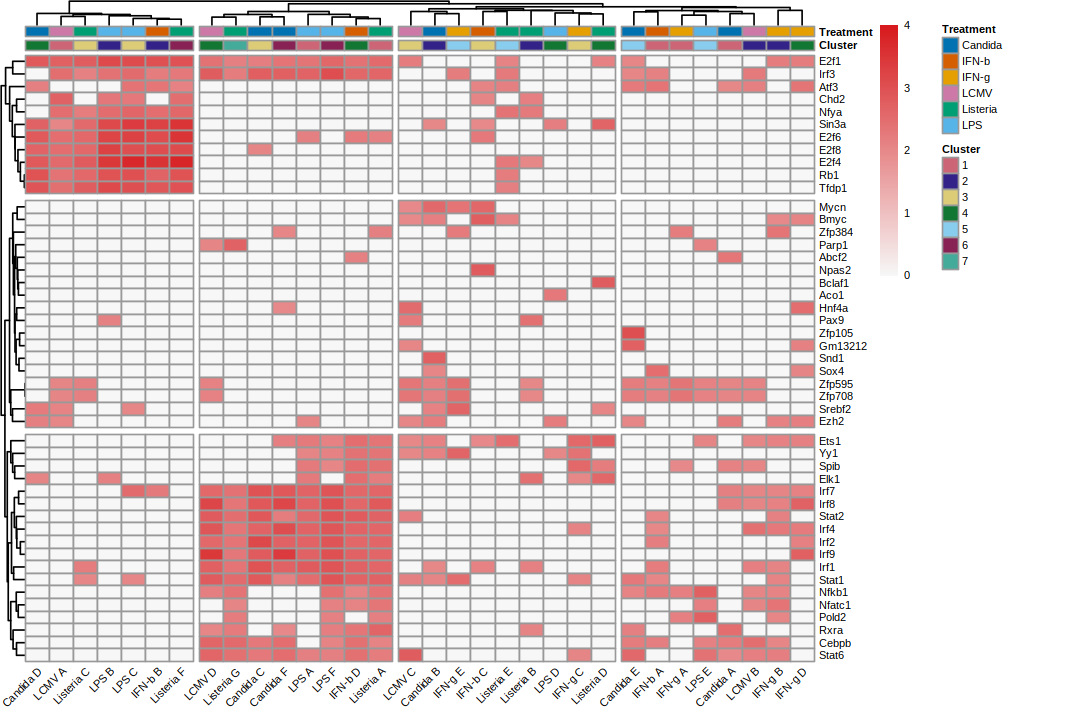

In [40]:
# plot heatmaps
TF_NES_all_HM_p <- as.ggplot(pheatmap(plot_tfs,
         show_rownames=TRUE,
         show_colnames=TRUE, 
         angle_col = "45",
         cutree_rows = 3, # split row clusters
         cutree_cols = 4, # split col clusters 
         treeheight_row = 10,
         treeheight_col = 10,
         annotation_col = annotation_col, # annotate clusters
         annotation_colors = ann_colors, # add color to labels
                                      drop_levels = TRUE,
         labels_col = cluster_format2(colnames(plot_tfs)),
         annotation_names_col = TRUE,
         breaks=seq(0, 4, length.out=200), # make log2(OR=1)=0 the middle of color scale
         color=colorRampPalette(c("#f7f7f7", "#d7191c"))(200),
         fontsize = 6,
         height=height,
         widht=width,
        silent=TRUE
      ))
TF_NES_all_HM_p

In [41]:
# save plot
ggsave_new(filename=paste0("INT_TF_NES_ALL_top",top_n),
           results_path=results_path,
           plot=TF_NES_all_HM_p,
           width=width,
           height=height
          )

# Copy and rename underlying enrichment tables 

## pathway enrichment analyses

In [42]:
db <- 'GO_Biological_Process_2021'

for (treatment in unique(annot$treatment)){
    if (treatment=='untreated'){
        next
    }

    # configs
    k_INT <- timeseries_k[treatment, 'INT']
    
    file.copy(from = file.path(data_path, "enrichment_analysis", "time_series",  treatment,  paste0('k_', k_INT),  paste0('summary_',db,'_adjpvalues.csv')),
          to = file.path(results_path, paste0("INT_enrichment_",treatment,'_',db,'_adjpvalues.csv')))
    
    file.copy(from = file.path(data_path, "enrichment_analysis", "time_series",  treatment,  paste0('k_', k_INT),  paste0('summary_',db,'_oddsratio.csv')),
          to = file.path(results_path, paste0("INT_enrichment_",treatment,'_',db,'_oddsratio.csv')))
}
    
    

## TF enrichment analyses

In [43]:
for (treatment in unique(annot$treatment)){
    if (treatment=='untreated'){
        next
    }
    # configs
    k_INT <- timeseries_k[treatment, 'INT']
    
    file.copy(from = file.path(data_path,'TF', paste0('INT_TF_time_series_',treatment,'_k',k_INT,'_summary_maxNES.csv')),
          to = file.path(results_path, paste0("INT_TF_NES_",treatment,'_maxNES.csv')))
}